# Market Analysis

Let's do a deep dive on one specific market, your choice. 

Let's get into the lab and take a peak at whats going on. 

**Note** This notebook will work with any of the 70k+ markets supported by the Parcl Labs API.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along. 

## Table of Contents

### [Market Overview](#market)
- Housing Stock/Mix Analysis
- Percent of Overall Market Owned by Investors
- Market Overview: Percent of all units that are rentals
- Who owns the homes? Size of investors in the market

### [Listing Overview](#listings)
- New listings analysis
- Of listings, what share do investors account for?

### [Prices Overview](#prices)
- Rental Prices
- New Listing for Sale Prices
- Purchase Prices

In [1]:
import os
from datetime import datetime

import pandas as pd
import plotly.express as px
from parcllabs import ParclLabsClient

api_key = os.getenv('PARCL_LABS_API_KEY')

In [2]:
client = ParclLabsClient(api_key=api_key)

In [3]:
# lets find cape coral metro, Las Vegas, etc. (i.e. CBSA)

results = client.search_markets.retrieve(
    query='Las Vegas',
    location_type='CBSA',
    as_dataframe=True
)

results

parcl_id country  geoid state_fips_code                              name  \
0   2900049     USA  29820            None  Las Vegas-Henderson-Paradise, Nv   
1   2900048     USA  29780            None                     Las Vegas, Nm   

  state_abbreviation region location_type  
0               None   None          CBSA  
1               None   None          CBSA

In [8]:
# we will use the cape coral parcl id of 2899822 throughout the rest of our analysis
analysis_parcl_id = results.iloc[0]['parcl_id']
name = results.iloc[0]['name']

# set default save directory
save_dir = './graphics'
new_dir_name = f"{analysis_parcl_id}-{name}-{datetime.today().date()}"
output_dir = os.path.join(save_dir, new_dir_name)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"In this analysis, we are studying: {name} which has parcl id: {analysis_parcl_id}. Saving graphics to: {save_dir}")

In this analysis, we are studying: Las Vegas-Henderson-Paradise, Nv which has parcl id: 2900049. Saving graphics to: ./graphics


<a id='market'></a>
#### Market Overview

Let's review housing stock mix, percent of housing stock owned by investors, and percent of all units that are rentals

In [9]:
housing_stock = client.market_metrics_housing_stock.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 100
    },
    as_dataframe=True # make life easy on ourselves
)

housing_stock

date  single_family   condo  townhouse  other  all_properties  \
0   2024-03-01         561031  173990      52425  77848          865294   
1   2024-02-01         560974  173980      52396  77795          865145   
2   2024-01-01         560886  173953      52375  77733          864947   
3   2023-12-01         560785  173920      52350  77673          864728   
4   2023-11-01         560715  173886      52341  77572          864514   
..         ...            ...     ...        ...    ...             ...   
58  2019-05-01         532072  172077      47107  76161          827417   
59  2019-04-01         531549  172070      47049  76148          826816   
60  2019-03-01         530525  172058      46998  76140          825721   
61  2019-02-01         530005  172048      46914  76129          825096   
62  2019-01-01         529612  172040      46887  76121          824660   

    parcl_id  
0    2900049  
1    2900049  
2    2900049  
3    2900049  
4    2900049  
..       ...  
58   2900049  
59   2900049  
60   2900049  
61   2900049  
62   2900049  

[63 rows x 7 columns]

In [10]:
housing_stock['pct_condo'] = housing_stock['condo']/housing_stock['all_properties']
housing_stock['pct_townhouse'] = housing_stock['townhouse']/housing_stock['all_properties']

housing_stock

date  single_family   condo  townhouse  other  all_properties  \
0   2024-03-01         561031  173990      52425  77848          865294   
1   2024-02-01         560974  173980      52396  77795          865145   
2   2024-01-01         560886  173953      52375  77733          864947   
3   2023-12-01         560785  173920      52350  77673          864728   
4   2023-11-01         560715  173886      52341  77572          864514   
..         ...            ...     ...        ...    ...             ...   
58  2019-05-01         532072  172077      47107  76161          827417   
59  2019-04-01         531549  172070      47049  76148          826816   
60  2019-03-01         530525  172058      46998  76140          825721   
61  2019-02-01         530005  172048      46914  76129          825096   
62  2019-01-01         529612  172040      46887  76121          824660   

    parcl_id  pct_condo  pct_townhouse  
0    2900049   0.201076       0.060586  
1    2900049   0.201099       0.060563  
2    2900049   0.201114       0.060553  
3    2900049   0.201127       0.060539  
4    2900049   0.201137       0.060544  
..       ...        ...            ...  
58   2900049   0.207969       0.056933  
59   2900049   0.208112       0.056904  
60   2900049   0.208373       0.056918  
61   2900049   0.208519       0.056859  
62   2900049   0.208619       0.056856  

[63 rows x 9 columns]

In [11]:
# Let's analyze how the percent of single family homes as a proportion of the overall housing stock has changed
# since 2019

housing_stock['pct_single_family'] = housing_stock['single_family']/housing_stock['all_properties']

In [12]:
labs_logo_lookup = {
    'blue': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png',
    'white': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api-logo-white.png'
}

# set charting constants
labs_logo_dict = dict(
        source=labs_logo_lookup['white'],
        xref="paper",
        yref="paper",
        x=0.5,  # Centering the logo below the title
        y=1.02,  # Adjust this value to position the logo just below the title
        sizex=0.15, 
        sizey=0.15,
        xanchor="center",
        yanchor="bottom"
)

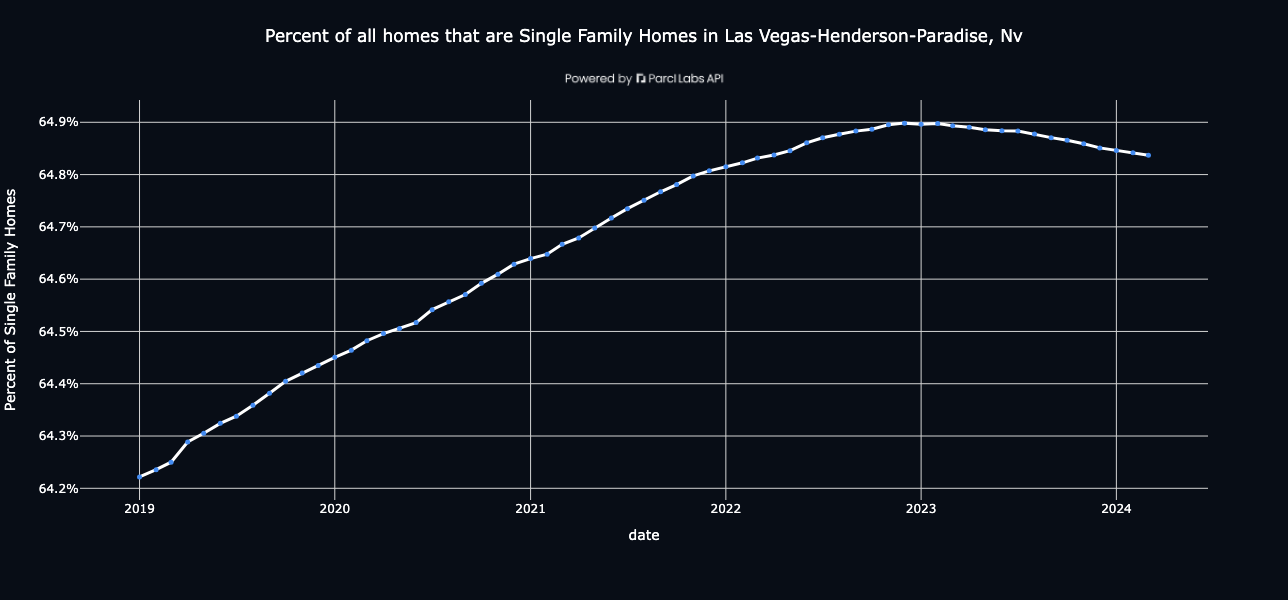

In [13]:
# Creating the line chart
fig = px.line(
    housing_stock, 
    x='date', 
    y='pct_single_family', 
    title=f'Percent of all homes that are Single Family Homes in {name}',
    labels={'pct_single_family': 'Percent of Single Family Homes'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".1%")

# Show the plot
fig.show()

In [14]:
# Now lets find out how much of this is owned by investors
investor_ownership = client.investor_metrics_housing_stock_ownership.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 200,
    },
    as_dataframe=True
)

# for graph formatting, divide pct_ownership by 100 since plotly handles this internally
investor_ownership['pct_ownership'] = investor_ownership['pct_ownership']/100

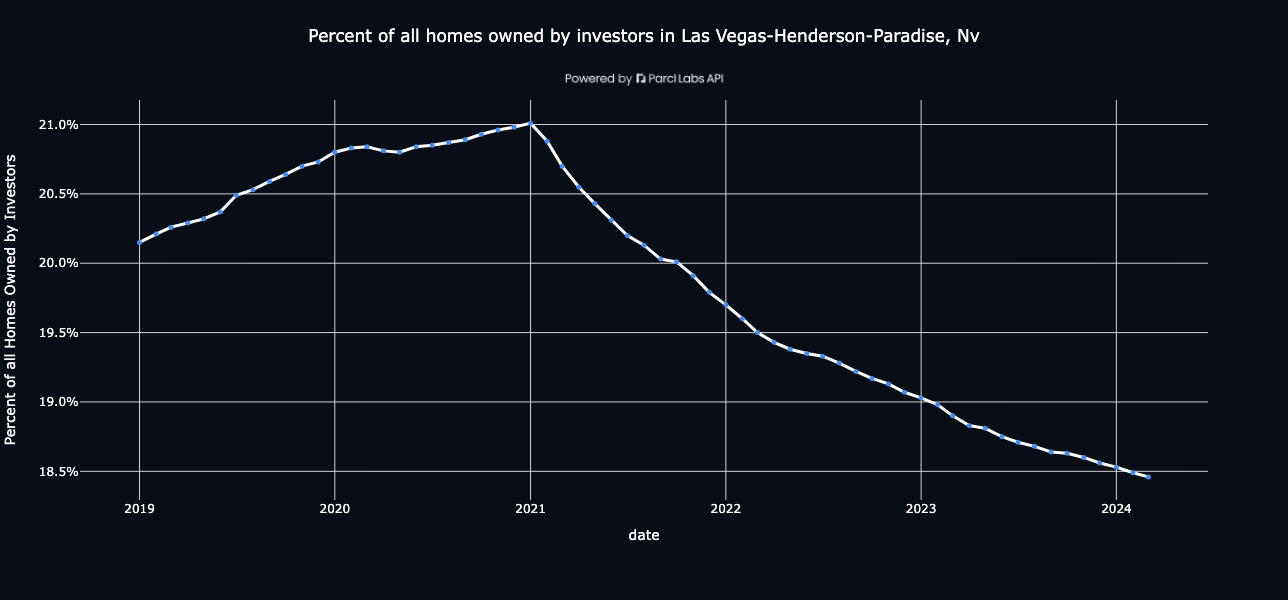

In [15]:
# Creating the line chart
fig = px.line(
    investor_ownership, 
    x='date', 
    y='pct_ownership', 
    title=f'Percent of all homes owned by investors in {name}',
    labels={'pct_ownership': 'Percent of all Homes Owned by Investors'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".1%") 

# Show the plot
fig.show()

In [16]:
# How big are the investors? Let's find out
portfolio_size_ownership = client.portfolio_metrics_sf_housing_stock_ownership.retrieve(
    parcl_id=analysis_parcl_id,
    as_dataframe=True
)

portfolio_size_ownership

date  count_portfolio_2_to_9  count_portfolio_10_to_99  \
0  2024-03-01                   77003                     12355   

   count_portfolio_100_to_999  count_portfolio_1000_plus  \
0                        1682                      14257   

   count_all_portfolios  pct_sf_housing_stock_portfolio_2_to_9  \
0                105297                                  13.73   

   pct_sf_housing_stock_portfolio_10_to_99  \
0                                      2.2   

   pct_sf_housing_stock_portfolio_100_to_999  \
0                                        0.3   

   pct_sf_housing_stock_portfolio_1000_plus  \
0                                      2.54   

   pct_sf_housing_stock_all_portfolios  parcl_id  
0                                18.77   2900049

In [17]:
# lets focus on the percentages
pso_pcts = portfolio_size_ownership[[
    'date', 
    'pct_sf_housing_stock_portfolio_2_to_9', 
    'pct_sf_housing_stock_portfolio_10_to_99', 
    'pct_sf_housing_stock_portfolio_100_to_999',
    'pct_sf_housing_stock_portfolio_1000_plus',
    'pct_sf_housing_stock_all_portfolios'
]]

pso_pcts_long = pso_pcts.melt(id_vars=['date'], var_name='category', value_name='percentage')
pso_pcts_long['percentage'] = pso_pcts_long['percentage']/100

# rename to friendly labels
friendly_labels = {
    'pct_sf_housing_stock_portfolio_2_to_9': 'Investor Portfolio (2 to 9 Units)', 
    'pct_sf_housing_stock_portfolio_10_to_99': 'Investor Portfolio (10 to 99 Units)', 
    'pct_sf_housing_stock_portfolio_100_to_999': 'Investor Portfolio (100 to 999 Units)',
    'pct_sf_housing_stock_portfolio_1000_plus': 'Investor Portfolio (1000+ Units)',
    'pct_sf_housing_stock_all_portfolios': 'Investor Portfolio (All Sizes)'
}

pso_pcts_long['category'] = pso_pcts_long['category'].replace(friendly_labels)
pso_pcts_long

date                               category  percentage
0  2024-03-01      Investor Portfolio (2 to 9 Units)      0.1373
1  2024-03-01    Investor Portfolio (10 to 99 Units)      0.0220
2  2024-03-01  Investor Portfolio (100 to 999 Units)      0.0030
3  2024-03-01       Investor Portfolio (1000+ Units)      0.0254
4  2024-03-01         Investor Portfolio (All Sizes)      0.1877

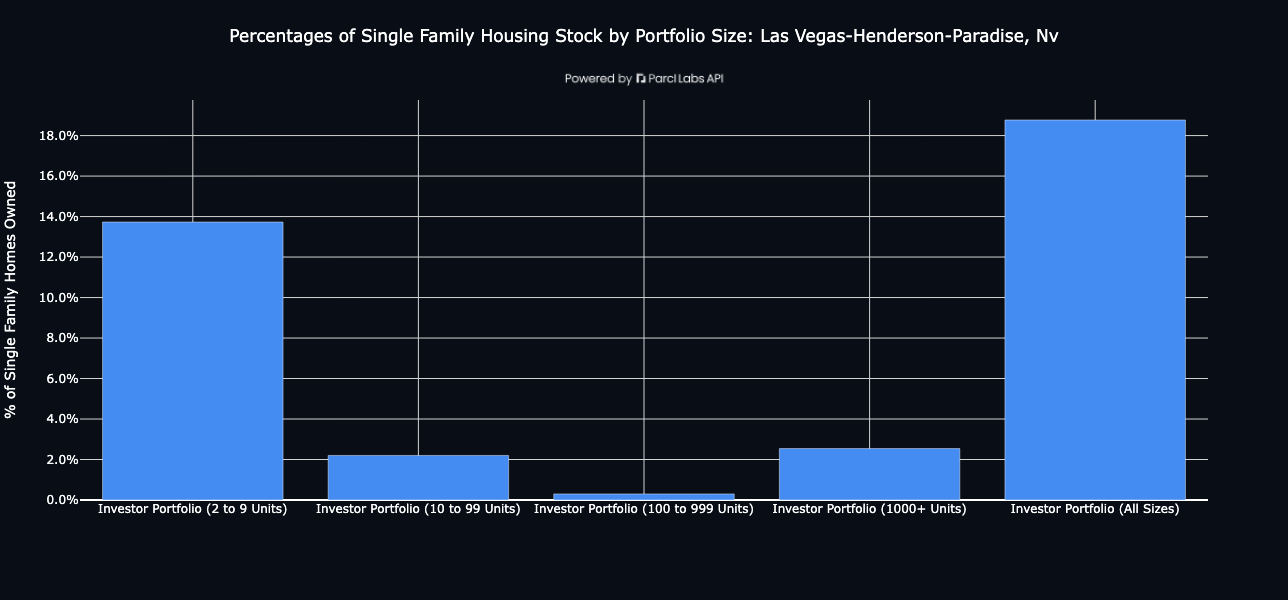

In [18]:
fig = px.bar(
    pso_pcts_long,
    x='category',
    y='percentage',
    title=f'Percentages of Single Family Housing Stock by Portfolio Size: {name}',
    labels={'percentage': '% of Single Family Homes Owned', 'category': 'Portfolio Size'},
    color_discrete_sequence=['#448CF2']  # Sets the color of the bars
)

# Adding layout image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)' 
    ),
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16', 
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
)

# Removing x-axis title as requested in previous query
fig.update_layout(xaxis_title="")
fig.update_yaxes(tickformat=".1%") 

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()


In [19]:
# now lets find out what percent of all homes are rental units

rental_unit_concentration = client.rental_market_metrics_rental_units_concentration.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 200
    },
    as_dataframe=True
)

# for graph formatting, divide pct_rental_concentration by 100 since plotly handles this internally
rental_unit_concentration['pct_rental_concentration'] = rental_unit_concentration['pct_rental_concentration']/100

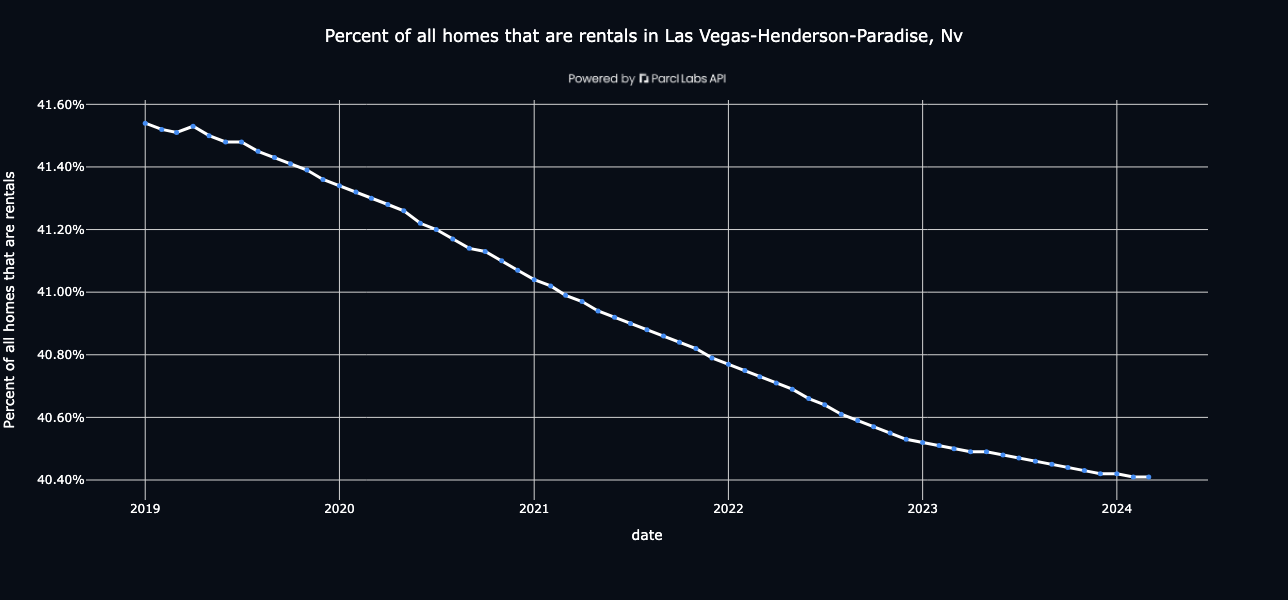

In [20]:
# Creating the line chart
fig = px.line(
    rental_unit_concentration, 
    x='date', 
    y='pct_rental_concentration', 
    title=f'Percent of all homes that are rentals in {name}',
    labels={'pct_rental_concentration': 'Percent of all homes that are rentals'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16', 
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".2%")  # Formats as percentage with one decimal place

# Show the plot
fig.show()

<a id='listings'></a>
#### New Listings Analysis
Capture the change in new listings on a 7, 30, 60 and 90 day basis

In [32]:
# first order of business, lets see how new listings have changed over the last year
start_date = '2023-01-01'

new_listings = client.for_sale_market_metrics_new_listings_rolling_counts.retrieve(
    parcl_id=analysis_parcl_id,
    start_date=start_date,
    as_dataframe=True,
    params={
        'limit': 300
    }
)
new_listings.tail()

date  rolling_7_day  rolling_30_day  rolling_60_day  rolling_90_day  \
64  2023-01-30           1378            5738            9946           15063   
65  2023-01-23           1294            4982            9329           15060   
66  2023-01-16           1552            4646            9214           15429   
67  2023-01-09           1346            4101            9032           15521   
68  2023-01-02            713            3907            9008           15978   

    parcl_id  
64   2900049  
65   2900049  
66   2900049  
67   2900049  
68   2900049

In [33]:
new_listings_long = pd.melt(
    new_listings, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['rolling_30_day', 'rolling_60_day', 'rolling_90_day'],
    value_name='Number of New Listings',
    var_name='Rolling Window (Days)'
)

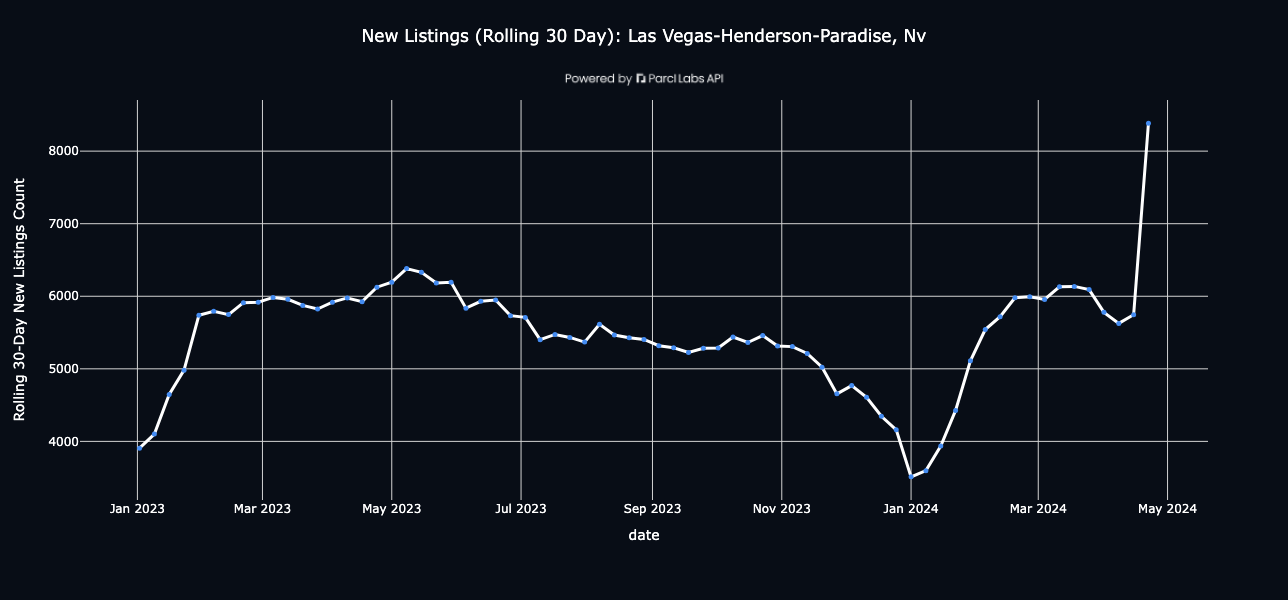

In [34]:
# Creating the line chart
fig = px.line(
    new_listings, 
    x='date', 
    y='rolling_30_day', 
    title=f'New Listings (Rolling 30 Day): {name}',
    labels={'rolling_30_day': 'Rolling 30-Day New Listings Count'}
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5) 
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()

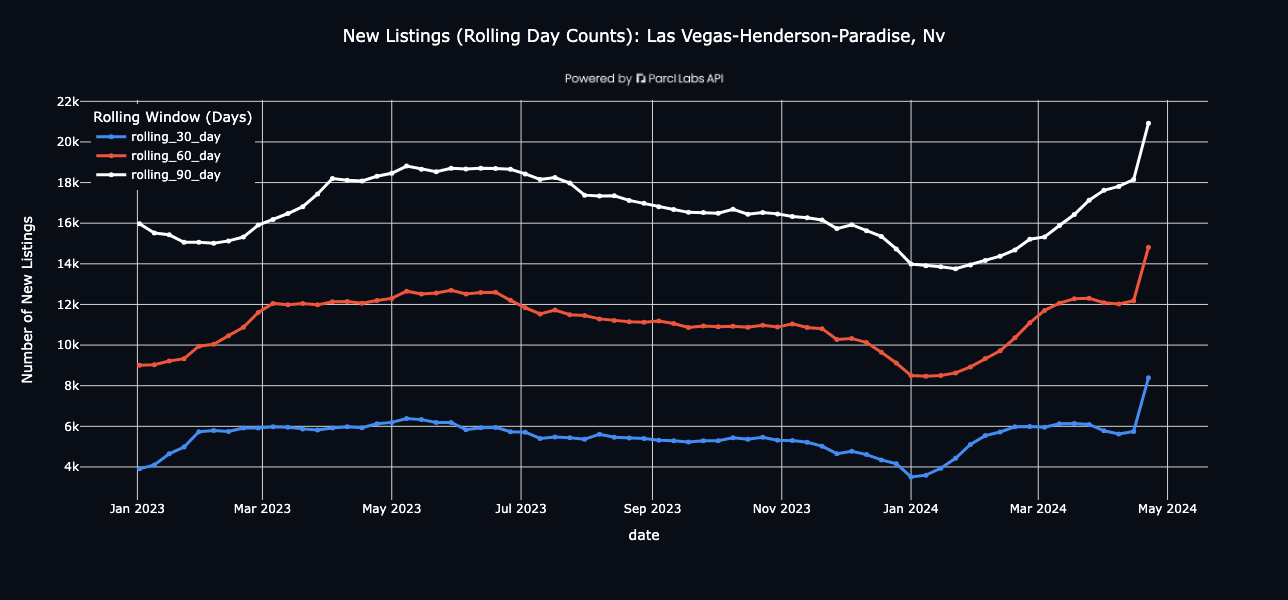

In [35]:
# Creating the line chart
fig = px.line(
    new_listings_long,
    x='date',
    y='Number of New Listings',
    color='Rolling Window (Days)',
    title=f'New Listings (Rolling Day Counts): {name}',
    labels={'count': 'Rolling Day Count'}
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

color_map = {
    'rolling_30_day': '#448CF2',
    'rolling_90_day': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)

for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()

In [36]:
# of listings on the market, what percent of them are coming from investors?

investor_listings = client.investor_metrics_new_listings_for_sale_rolling_counts.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 300
    },
    as_dataframe=True
)

investor_listings['pct_for_sale_market'] = investor_listings['pct_for_sale_market']/100
investor_listings.head(4)

date          period  counts  pct_for_sale_market  parcl_id
0  2024-04-22   rolling_7_day     987               0.2519   2900049
1  2024-04-22  rolling_30_day    1847               0.2202   2900049
2  2024-04-22  rolling_60_day    3338               0.2253   2900049
3  2024-04-22  rolling_90_day    4741               0.2265   2900049

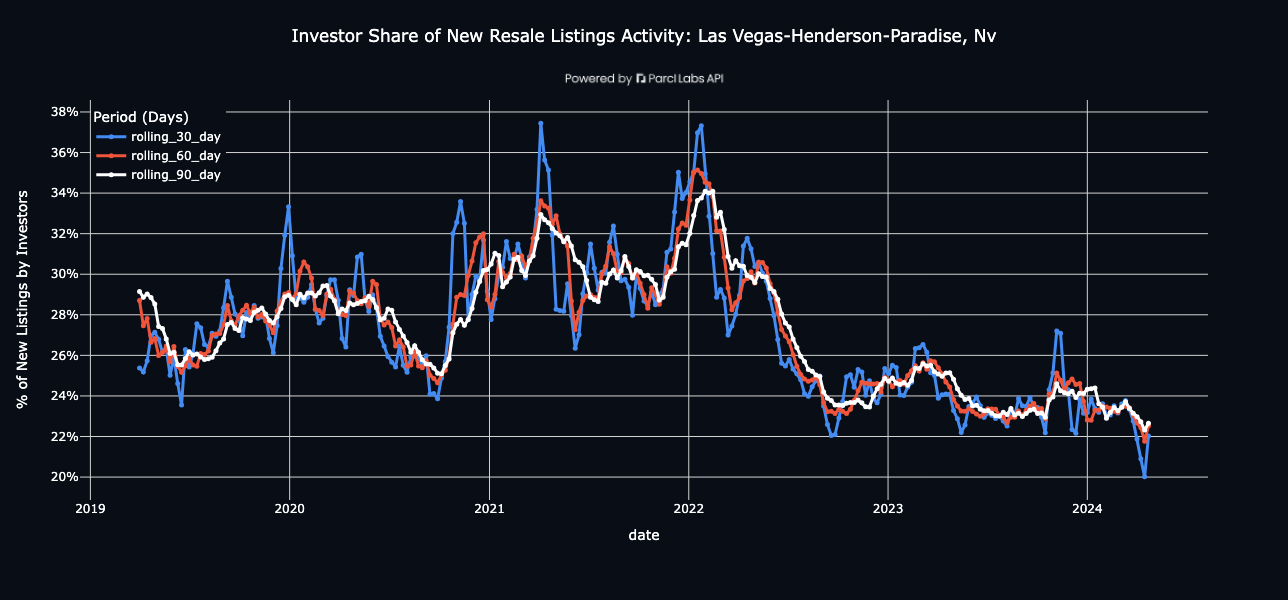

In [37]:
fig = px.line(
    investor_listings.loc[investor_listings['period'] != 'rolling_7_day'],
    x='date',
    y='pct_for_sale_market',
    color='period',  # This creates separate lines for each period
    title=f'Investor Share of New Resale Listings Activity: {name}',
    labels={'pct_for_sale_market': '% of New Listings by Investors'},
    line_shape='linear'  # 'spline' for smooth lines, if preferred
)

fig.add_layout_image(labs_logo_dict)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Period (Days)'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date' 
)

fig.update_yaxes(tickformat=".0%")

color_map = {
    'rolling_30_day': '#448CF2',
    'rolling_90_day': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)


for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()


<a id='prices'></a>
### Price Activity

Let's review rental prices, new listing prices and home sales prices. 

In [38]:
# Prices
prices = client.market_metrics_housing_event_prices.retrieve(
    parcl_id=analysis_parcl_id,
    as_dataframe=True,
    params={
        'limit': 300
    }
)

prices_long = prices[['date', 'parcl_id', 'price_median_sales', 'price_median_new_listings_for_sale']]

prices_long = pd.melt(
    prices_long, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['price_median_sales', 'price_median_new_listings_for_sale'],
    value_name='Median Price ($)',
    var_name='Transaction Type'
)

r = {
    'price_median_sales': 'Median Sales Price',
    'price_median_new_listings_for_sale': 'Median New Listing Price'
}

prices_long['Transaction Type'] = prices_long['Transaction Type'].replace(r)

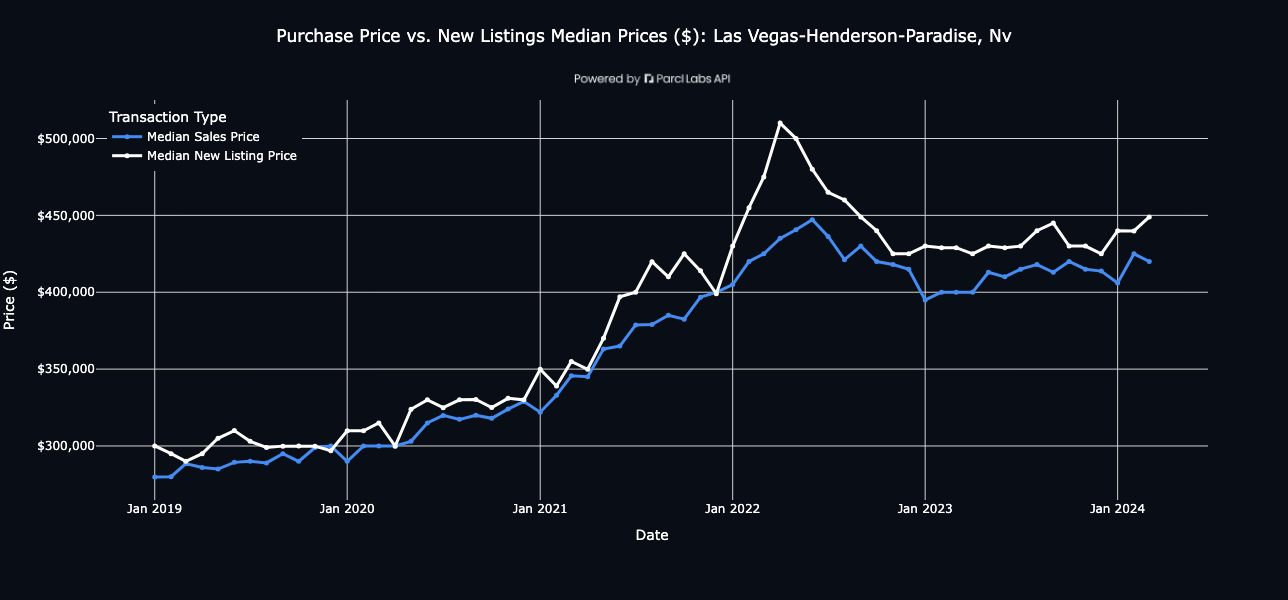

In [39]:
# Creating the line chart
fig = px.line(
    prices_long,
    x='date',
    y='Median Price ($)',
    color='Transaction Type',
    title=f'Purchase Price vs. New Listings Median Prices ($): {name}',
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Date",
    yaxis_title="Price ($)",
    yaxis_tickformat='$,', 
    xaxis_tickformat='%b %Y',
    plot_bgcolor='#080D16', 
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    showlegend=True, 
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
)

color_map = {
    'Median Sales Price': '#448CF2',
    'Median New Listing Price': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)

for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()

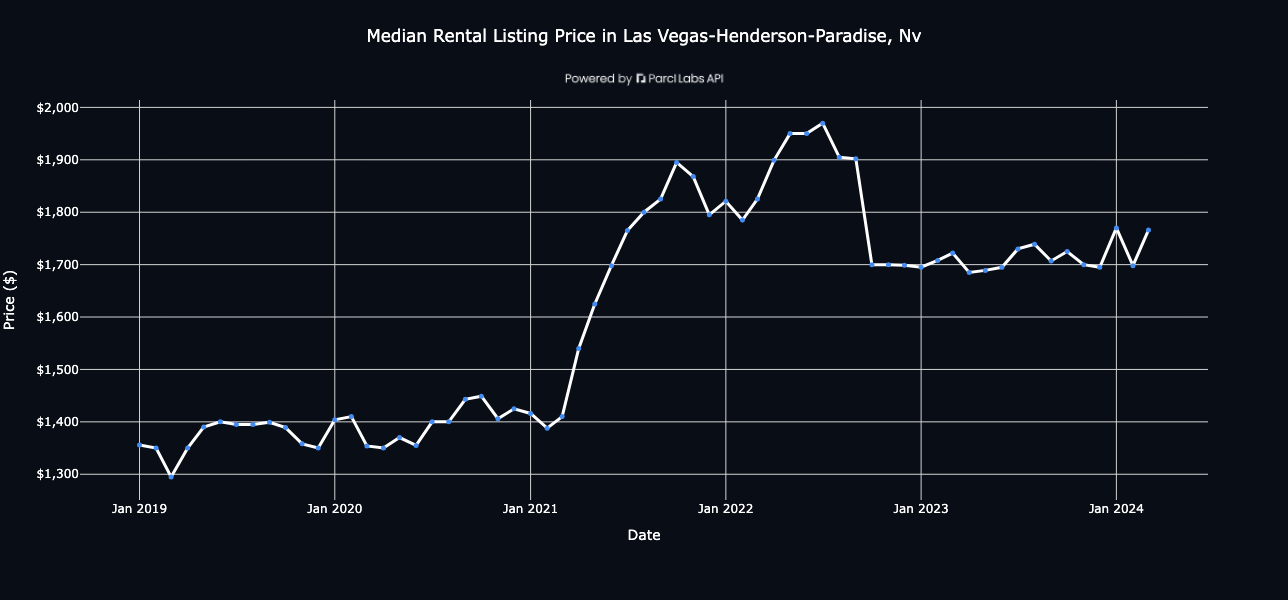

In [40]:
fig = px.line(
    prices, 
    x='date', 
    y='price_median_new_rental_listings', 
    title=f'Median Rental Listing Price in {name}',  # Add city or location in title if needed
    labels={'price_median_new_rental_listings': 'Asking Rental Price ($)'},
    line_shape='linear'  # 'spline' for smooth lines, if preferred
)

# Adding layout image
fig.add_layout_image(labs_logo_dict)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    title={
        'y':0.95, 
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Date",
    yaxis_title="Price ($)",
    yaxis_tickformat='$,',
    xaxis_tickformat='%b %Y',
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    showlegend=True,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()
